## Observations and Insights 

In [209]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
mouse_metadata
#study_results
# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="inner")

# Display the data table for preview
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.

combined_df["Mouse ID"].count()

1893

In [42]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#grouped_mice = combined_df.groupby("Mouse ID")
cleaned_grouped = combined_df.loc[combined_df["Mouse ID"].duplicated(), ["Mouse ID", "Timepoint"]]


In [ ]:
# Optional: Get all the data for the duplicate mouse ID. 



In [43]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

combined_group = pd.merge(cleaned_grouped, combined_df, on=["Mouse ID", "Timepoint"], how="inner")
combined_group


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,k403,5,Ramicane,Male,21,16,38.825898,0
1,k403,10,Ramicane,Male,21,16,35.014271,1
2,k403,15,Ramicane,Male,21,16,34.223992,1
3,k403,20,Ramicane,Male,21,16,32.997729,1
4,k403,25,Ramicane,Male,21,16,33.464577,1
...,...,...,...,...,...,...,...,...
1648,z969,25,Naftisol,Male,9,30,63.145652,2
1649,z969,30,Naftisol,Male,9,30,65.841013,3
1650,z969,35,Naftisol,Male,9,30,69.176246,4
1651,z969,40,Naftisol,Male,9,30,70.314904,4


In [44]:
# Checking the number of mice in the clean DataFrame.
combined_group["Mouse ID"].count()

1653

## Summary Statistics

In [134]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume 
#for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

# create series for each drug
capomulin_df = combined_group.loc[combined_group["Drug Regimen"] == "Capomulin", :]
ramicane_df = combined_group.loc[combined_group["Drug Regimen"] == "Ramicane", :]
ketapril_df = combined_group.loc[combined_group["Drug Regimen"] == "Ketapril", :]
natftisol_df = combined_group.loc[combined_group["Drug Regimen"] == "Naftisol", :]
stelasyn_df = combined_group.loc[combined_group["Drug Regimen"] == "Stelasyn", :]
zoniferol_df = combined_group.loc[combined_group["Drug Regimen"] == "Zoniferol", :]
placebo_df = combined_group.loc[combined_group["Drug Regimen"] == "Placebo", :]
ceftamin_df = combined_group.loc[combined_group["Drug Regimen"] == "Ceftamin", :]
infubinol_df = combined_group.loc[combined_group["Drug Regimen"] == "Infubinol", :]
propriva_df = combined_group.loc[combined_group["Drug Regimen"] == "Propriva", :]

# find mean for tumors with each drug
cap_mean = capomulin_df["Tumor Volume (mm3)"].mean()
ram_mean = ramicane_df["Tumor Volume (mm3)"].mean()
key_mean = ketapril_df["Tumor Volume (mm3)"].mean()
naf_mean = natftisol_df["Tumor Volume (mm3)"].mean()
ste_mean = stelasyn_df["Tumor Volume (mm3)"].mean()
zon_mean = zoniferol_df["Tumor Volume (mm3)"].mean()
pla_mean = placebo_df["Tumor Volume (mm3)"].mean()
cef_mean = ceftamin_df["Tumor Volume (mm3)"].mean()
inf_mean = infubinol_df["Tumor Volume (mm3)"].mean()
pro_mean = propriva_df["Tumor Volume (mm3)"].mean()

#find median for tumors with each drug
cap_med = capomulin_df["Tumor Volume (mm3)"].median()
ram_med = ramicane_df["Tumor Volume (mm3)"].median()
key_med = ketapril_df["Tumor Volume (mm3)"].median()
naf_med = natftisol_df["Tumor Volume (mm3)"].median()
ste_med = stelasyn_df["Tumor Volume (mm3)"].median()
zon_med = zoniferol_df["Tumor Volume (mm3)"].median()
pla_med = placebo_df["Tumor Volume (mm3)"].median()
cef_med = ceftamin_df["Tumor Volume (mm3)"].median()
inf_med = infubinol_df["Tumor Volume (mm3)"].median()
pro_med = propriva_df["Tumor Volume (mm3)"].median()

#find variance 
cap_var = capomulin_df["Tumor Volume (mm3)"].var()
ram_var = ramicane_df["Tumor Volume (mm3)"].var()
key_var = ketapril_df["Tumor Volume (mm3)"].var()
naf_var = natftisol_df["Tumor Volume (mm3)"].var()
ste_var = stelasyn_df["Tumor Volume (mm3)"].var()
zon_var = zoniferol_df["Tumor Volume (mm3)"].var()
pla_var = placebo_df["Tumor Volume (mm3)"].var()
cef_var = ceftamin_df["Tumor Volume (mm3)"].var()
inf_var = infubinol_df["Tumor Volume (mm3)"].var()
pro_var = propriva_df["Tumor Volume (mm3)"].var()

# find standard devaition 
cap_std = capomulin_df["Tumor Volume (mm3)"].std()
ram_std = ramicane_df["Tumor Volume (mm3)"].std()
key_std = ketapril_df["Tumor Volume (mm3)"].std()
naf_std = natftisol_df["Tumor Volume (mm3)"].std()
ste_std = stelasyn_df["Tumor Volume (mm3)"].std()
zon_std = zoniferol_df["Tumor Volume (mm3)"].std()
pla_std = placebo_df["Tumor Volume (mm3)"].std()
cef_std = ceftamin_df["Tumor Volume (mm3)"].std()
inf_std = infubinol_df["Tumor Volume (mm3)"].std()
pro_std = propriva_df["Tumor Volume (mm3)"].std()

# find sem
cap_sem = capomulin_df["Tumor Volume (mm3)"].sem()
ram_sem = ramicane_df["Tumor Volume (mm3)"].sem()
key_sem = ketapril_df["Tumor Volume (mm3)"].sem()
naf_sem = natftisol_df["Tumor Volume (mm3)"].sem()
ste_sem = stelasyn_df["Tumor Volume (mm3)"].sem()
zon_sem = zoniferol_df["Tumor Volume (mm3)"].sem()
pla_sem = placebo_df["Tumor Volume (mm3)"].sem()
cef_sem = ceftamin_df["Tumor Volume (mm3)"].sem()
inf_sem = infubinol_df["Tumor Volume (mm3)"].sem()
pro_sem = propriva_df["Tumor Volume (mm3)"].sem()

#build new frame
data = ({"Drug Regimen": ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Stelasyn", "Zoniferol", "Placebo", 
         "Ceftamin", "Infubinol", "Propriva"], 
          "Mean": [cap_mean, ram_mean, key_mean, naf_mean, ste_mean, zon_mean, pla_mean, cef_mean,
                   inf_mean, pro_mean],
        "Median": [cap_med, ram_med, key_med, naf_med, ste_med, zon_med, pla_med, cef_med, inf_med, pro_med],
        "Variance": [cap_var, ram_var, key_var, naf_var, ste_var, zon_var, pla_var, cef_var, inf_var, pro_var],
        "Standard Deviation": [cap_std, ram_std, key_std, naf_std, ste_std, zon_std, pla_std, cef_std, 
                               inf_std, pro_std],
        "SEM": [cap_sem, ram_sem, key_sem, naf_sem, ste_sem, zon_sem, pla_sem, cef_sem, inf_sem, pro_sem]})
sum_stat_df = pd.DataFrame(data)
sum_stat_df



,Drug Regimen,Mean,Median,Variance,Standard Deviation,SEM
0,Capomulin,40.148392,40.716428,25.434058,5.043219,0.352234
1,Ramicane,39.627674,39.769552,23.213127,4.818000,0.338157
2,Ketapril,56.805521,56.098998,60.485143,7.777219,0.609159
3,Naftisol,55.780565,54.234502,60.794406,7.797077,0.614496
4,Stelasyn,55.644586,54.328317,53.476333,7.312751,0.583621
5,Zoniferol,54.548052,53.287287,43.708157,6.611214,0.527632
6,Placebo,55.481270,53.354528,55.762387,7.467422,0.597872
7,Ceftamin,53.831559,52.847559,34.725752,5.892856,0.476409
8,Infubinol,54.173160,53.244458,38.326085,6.190806,0.500497
9,Propriva,53.494244,52.132321,37.141207,6.094359,0.506109


In [171]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume 
#for each regimen
# This method produces everything in a single groupby function
single_groupby_df =  combined_group.groupby(["Drug Regimen"]).describe()
final_single_groupby_df =  single_groupby_df.drop(["Timepoint", "Age_months", "Metastatic Sites", "Weight (g)"], axis = 1)
final_single_groupby_df 


Tumor Volume (mm3)                                             \
                          count       mean       std        min        25%   
Drug Regimen                                                                 
Capomulin                 205.0  40.148392  5.043219  23.343598  36.843898   
Ceftamin                  153.0  53.831559  5.892856  45.546076  48.722078   
Infubinol                 153.0  54.173160  6.190806  36.321346  49.431685   
Ketapril                  163.0  56.805521  7.777219  45.694188  50.154711   
Naftisol                  161.0  55.780565  7.797077  45.656978  49.040225   
Placebo                   156.0  55.481270  7.467422  45.691124  48.917293   
Propriva                  145.0  53.494244  6.094359  45.000000  48.786801   
Ramicane                  203.0  39.627674  4.818000  22.050126  36.236711   
Stelasyn                  157.0  55.644586  7.312751  45.751727  49.412624   
Zoniferol                 157.0  54.548052  6.611214  45.523014  49.001866   

                                               
                    50%        75%        max  
Drug Regimen                                   
Capomulin     40.716428  44.160519  48.158209  
Ceftamin      52.847559  58.077583  68.923185  
Infubinol     53.244458  58.268442  72.226731  
Ketapril      56.098998  62.142332  78.567014  
Naftisol      54.234502  61.190387  76.668817  
Placebo       53.354528  60.537900  73.212939  
Propriva      52.132321  56.683558  72.455421  
Ramicane      39.769552  43.578020  47.622816  
Stelasyn      54.328317  60.605440  75.123690  
Zoniferol     53.287287  59.364353  73.324432

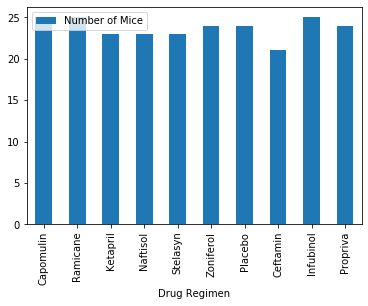

In [360]:
# Generate a bar plot showing the total number of mice for each treatment throughout the 
#course of the study using pandas. 

Capomulin_mice = combined_group.loc[combined_group["Drug Regimen"] == "Capomulin"]
Capomulin_mice_unique = cap_mice["Mouse ID"].unique()
Capomulin_mice_num = len(cap_mice_unique)

Ceftamin_mice = combined_group.loc[combined_group["Drug Regimen"] == "Ceftamin"]
Ceftamin_mice_unique = Ceftamin_mice["Mouse ID"].unique()
Ceftamin_mice_num = len(Ceftamin_mice_unique)

Infubinol_mice = combined_group.loc[combined_group["Drug Regimen"] == "Infubinol"]
Infubinol_mice_unique = Infubinol_mice["Mouse ID"].unique()
Infubinol_mice_num = len(Infubinol_mice_unique)

Ketapril_mice = combined_group.loc[combined_group["Drug Regimen"] == "Ketapril"]
Ketapril_mice_unique = Ketapril_mice["Mouse ID"].unique()
Ketapril_mice_num = len(Ketapril_mice_unique)

Naftisol_mice = combined_group.loc[combined_group["Drug Regimen"] == "Naftisol"]
Naftisol_mice_unique = Naftisol_mice["Mouse ID"].unique()
Naftisol_mice_num = len(Naftisol_mice_unique)

Placebo_mice = combined_group.loc[combined_group["Drug Regimen"] == "Placebo"]
Placebo_mice_unique = Placebo_mice["Mouse ID"].unique()
Placebo_mice_num = len(Placebo_mice_unique)

Propriva_mice = combined_group.loc[combined_group["Drug Regimen"] == "Propriva"]
Propriva_mice_unique = Propriva_mice["Mouse ID"].unique()
Propriva_mice_num = len(Propriva_mice_unique)

Ramicane_mice = combined_group.loc[combined_group["Drug Regimen"] == "Ramicane"]
Ramicane_mice_unique = Ramicane_mice["Mouse ID"].unique()
Ramicane_mice_num = len(Ramicane_mice_unique)

Stelasyn_mice = combined_group.loc[combined_group["Drug Regimen"] == "Stelasyn"]
Stelasyn_mice_unique = Stelasyn_mice["Mouse ID"].unique()
Stelasyn_mice_num = len(Stelasyn_mice_unique)

Zoniferol_mice = combined_group.loc[combined_group["Drug Regimen"] == "Zoniferol"]
Zoniferol_mice_unique = Zoniferol_mice["Mouse ID"].unique()
Zoniferol_mice_num = len(Zoniferol_mice_unique)

bar_df_data = ({"Drug Regimen": ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Stelasyn", "Zoniferol", "Placebo", 
                                 "Ceftamin", "Infubinol", "Propriva"], 
                "Number of Mice": [Capomulin_mice_num, Ramicane_mice_num, Ketapril_mice_num, Naftisol_mice_num,
                                   Stelasyn_mice_num, Zoniferol_mice_num, Placebo_mice_num, Ceftamin_mice_num, 
                                   Infubinol_mice_num, Propriva_mice_num]}) 
bar_df = pd.DataFrame(bar_df_data)
#cap_mice_num = cap_mice_unique.count()
#cleaned_df.plot(kind="bar")
panda_bar = bar_df.plot(kind='bar', x='Drug Regimen', y='Number of Mice', rot=90)




<BarContainer object of 10 artists>

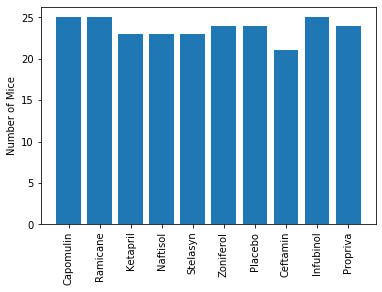

In [346]:
# Generate a bar plot showing the total number of mice for each treatment throughout the 
#course of the study using pyplot.

x_value1 = bar_df["Drug Regimen"]
y_value1 = bar_df["Number of Mice"]

mat_bar = plt.bar(x_value1, y_value1)
plt.xticks(x_value1, rotation="vertical")
plt.ylabel("Number of Mice")
mat_bar

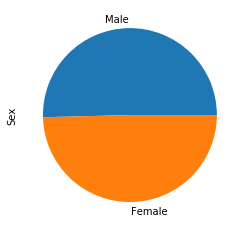

In [235]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#pie_data = combined_group.groupby(["Sex"])
#panda_pie = combined_group.plot.pie(y = pie_data, figsize = (5,5))
pie_data = combined_group["Sex"].value_counts()
pandas_plot = pie_data.plot.pie(y= 'Sex')


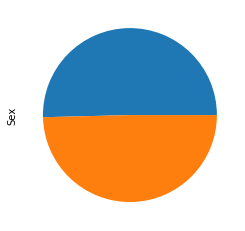

In [350]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#labels = ["Male, Female"]

plt.pie(pie_data)
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [335]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
Capomulin_identify_time = combined_group.loc[combined_group["Drug Regimen"] == "Capomulin"]
Capomulin_max_time = Capomulin_identify_time.loc[Capomulin_identify_time["Timepoint"] == 45]
#Capomulin_max_time

Ramicane_identify_time = combined_group.loc[combined_group["Drug Regimen"] == "Ramicane"]
Ramicane_max_time = Ramicane_identify_time.loc[Ramicane_identify_time["Timepoint"] == 45]
#Ramicane_max_time

Infubinol_identify_time = combined_group.loc[combined_group["Drug Regimen"] == "Infubinol"]
Infubinol_max_time = Infubinol_identify_time.loc[Infubinol_identify_time["Timepoint"] == 45]
#print(Infubinol_max_time)

Ceftamin_identify_time = combined_group.loc[combined_group["Drug Regimen"] == "Ceftamin"]
Ceftamin_max_time = Ceftamin_identify_time.loc[Ceftamin_identify_time["Timepoint"] == 45]
#Ceftamin_max_time

#max_time_df = combined_group.loc[combined_group["Timepoint"] == 45]
##drugs_max_time_df = max_time_df.loc[["Capomulin" 'Ramicane', 'Infubinol', "Ceftamin"], ["Drug Regimen"]]
                                                
                                                
#drugs_max_time_df = max_time_df.loc[max_time_df["Drug Regimen"] == "Capomulin", |["Drug Regimen"] == 'Ramicane', |
                                   # ["Drug Regimen"] == 'Infubinol',| ["Drug Regimen"] == "Ceftamin"]
#drugs_max_time_df
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
#merge_time1 = pd.merge(Ceftamin_max_time, Capomulin_max_time, on="Timepoint", how="outer")
#merge_time1


     Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
413      a203         45    Infubinol  Female          20          23   
422      a251         45    Infubinol  Female          21          25   
481      a685         45    Infubinol    Male           8          30   
566      c139         45    Infubinol    Male          11          28   
709      e476         45    Infubinol    Male          23          26   
738      f345         45    Infubinol    Male          23          26   
937      k483         45    Infubinol  Female          20          30   
1584     y163         45    Infubinol  Female          17          27   
1634     z581         45    Infubinol  Female          24          25   

      Tumor Volume (mm3)  Metastatic Sites  
413            67.973419                 2  
422            65.525743                 1  
481            66.083066                 3  
566            72.226731                 2  
709            62.435404                 1  

In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
Capomulin_list
Ramicane_list
Infubino_list
Ceftamin_list

# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
